# **WeatherAUS**

## 1. Import Library

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [4]:
#menampilkan data dari file weatherAUS.csv
df = pd.read_csv('/content/weatherAUS.csv')

#menampilkan informasi dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10811 non-null  object 
 1   Location       10811 non-null  object 
 2   MinTemp        10757 non-null  float64
 3   MaxTemp        10766 non-null  float64
 4   Rainfall       10676 non-null  float64
 5   Evaporation    4357 non-null   float64
 6   Sunshine       2005 non-null   float64
 7   WindGustDir    10624 non-null  object 
 8   WindGustSpeed  10624 non-null  float64
 9   WindDir9am     9786 non-null   object 
 10  WindDir3pm     10657 non-null  object 
 11  WindSpeed9am   10730 non-null  float64
 12  WindSpeed3pm   10734 non-null  float64
 13  Humidity9am    10616 non-null  float64
 14  Humidity3pm    10610 non-null  float64
 15  Pressure9am    10599 non-null  float64
 16  Pressure3pm    10595 non-null  float64
 17  Cloud9am       5655 non-null   float64
 18  Cloud3

In [5]:
#menapilkan baris 5 pertama dan 5 baris terakhir dari dataframe
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          135
Evaporation      6454
Sunshine         8806
WindGustDir       187
WindGustSpeed     187
WindDir9am       1025
WindDir3pm        154
WindSpeed9am       81
WindSpeed3pm       77
Humidity9am       195
Humidity3pm       201
Pressure9am       212
Pressure3pm       216
Cloud9am         5156
Cloud3pm         4954
Temp9am            61
Temp3pm            64
RainToday         136
RainTomorrow      136
dtype: int64

In [7]:
# df = df.drop(['Date','Location','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1)
# df.head() 
# Untuk menghapus kolom yang tidak relevan

In [8]:
# Menampilkan semua nama kolom
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          135
Evaporation      6454
Sunshine         8806
WindGustDir       187
WindGustSpeed     187
WindDir9am       1025
WindDir3pm        154
WindSpeed9am       81
WindSpeed3pm       77
Humidity9am       195
Humidity3pm       201
Pressure9am       212
Pressure3pm       216
Cloud9am         5156
Cloud3pm         4954
Temp9am            61
Temp3pm            64
RainToday         136
RainTomorrow      136
dtype: int64

In [10]:
df = df.drop(['Date','Location','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [11]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
new_df = df.interpolate()

new_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,17.5,27.2,0.0,ENE,30.0,SSE,NE,13.0,22.0,61.0,62.0,1017.1,1016.4,25.5,26.5,No,No
10807,17.3,27.3,0.0,SSE,35.0,WSW,SSE,9.0,20.0,75.0,64.0,1020.2,1018.9,22.5,25.8,No,No
10808,18.3,27.1,0.0,SW,24.0,SSW,ESE,13.0,15.0,67.0,55.0,1021.7,1020.8,24.8,25.9,No,No
10809,17.8,28.1,0.0,ENE,33.0,SW,ENE,9.0,24.0,66.0,62.0,1023.2,1021.6,24.6,26.7,No,No


In [13]:
new_df = new_df.dropna()
new_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10805,17.9,26.4,1.6,ENE,37.0,NE,ENE,13.0,24.0,63.0,62.0,1019.7,1016.7,24.4,25.7,Yes,No
10806,17.5,27.2,0.0,ENE,30.0,SSE,NE,13.0,22.0,61.0,62.0,1017.1,1016.4,25.5,26.5,No,No
10807,17.3,27.3,0.0,SSE,35.0,WSW,SSE,9.0,20.0,75.0,64.0,1020.2,1018.9,22.5,25.8,No,No
10808,18.3,27.1,0.0,SW,24.0,SSW,ESE,13.0,15.0,67.0,55.0,1021.7,1020.8,24.8,25.9,No,No


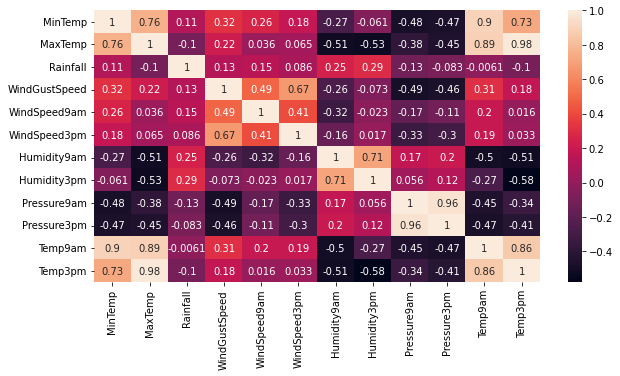

In [14]:
import seaborn as sns 
plt.figure(figsize=(10,5))
sns.heatmap(new_df.corr(), annot=True)

In [15]:
le = LabelEncoder()
new_df['WindGustDir'] = le.fit_transform(new_df['WindGustDir'])
new_df['WindDir9am'] = le.fit_transform(new_df['WindDir9am'])
new_df['WindDir3pm'] = le.fit_transform(new_df['WindDir3pm'])
new_df['RainToday'] = le.fit_transform(new_df['RainToday'])
new_df['RainTomorrow'] = le.fit_transform(new_df['RainTomorrow'])

new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10805,17.9,26.4,1.6,1,37.0,4,1,13.0,24.0,63.0,62.0,1019.7,1016.7,24.4,25.7,1,0
10806,17.5,27.2,0.0,1,30.0,10,4,13.0,22.0,61.0,62.0,1017.1,1016.4,25.5,26.5,0,0
10807,17.3,27.3,0.0,10,35.0,15,10,9.0,20.0,75.0,64.0,1020.2,1018.9,22.5,25.8,0,0
10808,18.3,27.1,0.0,12,24.0,11,2,13.0,15.0,67.0,55.0,1021.7,1020.8,24.8,25.9,0,0


In [16]:
X = new_df.drop(['RainTomorrow'], axis = 1)
y = new_df['RainTomorrow']

print('Shape X:',X.shape)
print('Shape y:',y.shape)

Shape X: (9496, 16)
Shape y: (9496,)


In [17]:
min_max = MinMaxScaler()

new_df = min_max.fit_transform(new_df)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def models(X_train, y_train):
  # logistic regression
  from sklearn.linear_model import LogisticRegression
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  
  # decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)

  # random forest 
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier()
  forest.fit(X_train, y_train)


  #Gaussiannb
  from sklearn.naive_bayes import GaussianNB 
  nb = GaussianNB()
  nb.fit(X_train, y_train)
  
 

  print('Logistic Regression Accuracy: ', logreg.score(X_train, y_train))
  print('Decision Tree Accuracy:', tree.score(X_train, y_train))
  print('Random Forest Accuracy:', forest.score(X_train, y_train))
  # # print('XGBoostClassifier:', xgb.score(X_train, y_train))
  print('GaussianNBClassifier:', nb.score(X_train, y_train))

  return logreg,tree, forest, nb

In [29]:
model = models(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Accuracy:  0.869536598209584
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
GaussianNBClassifier: 0.826882569773565


In [30]:
y_pred = model[1].predict(X_test)
print(y_pred)


[0 0 0 ... 0 0 0]


In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
for i in range(len(model)):
  print('Model', i)
  print('Accuracy:', accuracy_score(y_test, model[i].predict(X_test)))
  print(classification_report(y_test, model[i].predict(X_test)))
  print(confusion_matrix(y_test, model[i].predict(X_test)))

Model 0
Accuracy: 0.8610526315789474
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1518
           1       0.73      0.49      0.59       382

    accuracy                           0.86      1900
   macro avg       0.81      0.72      0.75      1900
weighted avg       0.85      0.86      0.85      1900

[[1448   70]
 [ 194  188]]
Model 1
Accuracy: 0.8073684210526316
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1518
           1       0.52      0.49      0.51       382

    accuracy                           0.81      1900
   macro avg       0.70      0.69      0.69      1900
weighted avg       0.80      0.81      0.81      1900

[[1345  173]
 [ 193  189]]
Model 2
Accuracy: 0.8726315789473684
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1518
           1       0.77      0.52      0.62       382

    accuracy     

Text(51.0, 0.5, 'y_true')

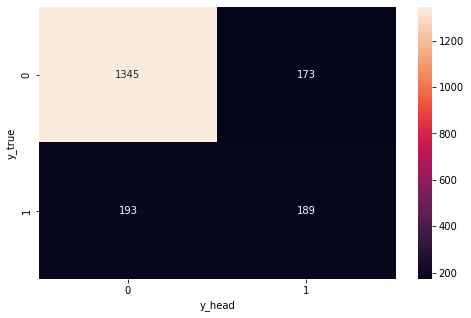

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")